### Importação dos dados



In [2]:
import pandas as pd

# Lista de URLs e nomes das lojas
urls_lojas = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Lê cada loja, adicionando a coluna "Loja"
dfs = []
for nome_loja, url in urls_lojas.items():
    df_loja = pd.read_csv(url)
    df_loja["Loja"] = nome_loja  # adiciona a coluna "Loja"
    dfs.append(df_loja)

# Junta tudo
df = pd.concat(dfs, ignore_index=True)

# Atualiza o cálculo do faturamento
df["Faturamento"] = df["Preço"] + df["Frete"]


# Criar a coluna de faturamento
df["Faturamento"] = df["Preço"] + df["Frete"]

#1. Análise do faturamento


In [3]:
# ------------------------------
# 1. Faturamento Total
# ------------------------------
faturamento_total = df["Faturamento"].sum()
print(f"\n💰 Faturamento Total: R$ {faturamento_total:,.2f}")


# ------------------------------
# 1. Análise de faturamento por loja
# ------------------------------
faturamento_por_loja = df.groupby("Loja")["Faturamento"].sum().sort_values(ascending=False)
print("\n💰 Faturamento por loja:")
print(round(faturamento_por_loja,2))


💰 Faturamento Total: R$ 6,184,421.45

💰 Faturamento por loja:
Loja
Loja 1    1616347.09
Loja 2    1567773.22
Loja 3    1542047.69
Loja 4    1458253.46
Name: Faturamento, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")

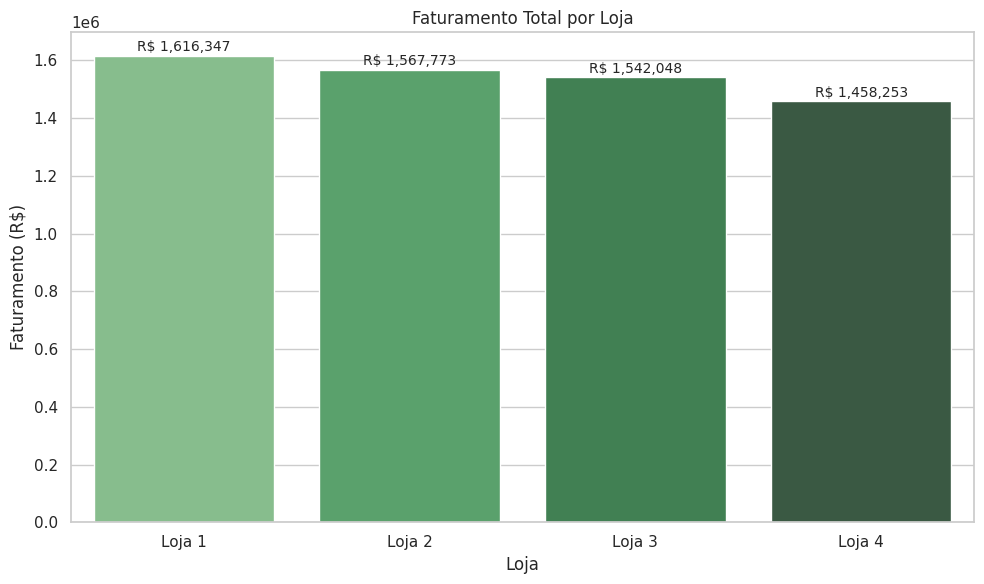

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=faturamento_por_loja.index, y=faturamento_por_loja.values, palette="Greens_d", hue=faturamento_por_loja.index, legend=False)


# Adiciona os valores em cima de cada barra
for i, valor in enumerate(faturamento_por_loja.values):
    plt.text(i, valor + 5000, f"R$ {valor:,.0f}", ha="center", va="bottom", fontsize=10)

plt.title("Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [5]:
# ------------------------------
# 2. Categorias Mais Vendidas
# ------------------------------
categorias_vendidas = df["Categoria do Produto"].value_counts()
print("\n Categorias mais vendidas:")
print(categorias_vendidas)



 Categorias mais vendidas:
Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


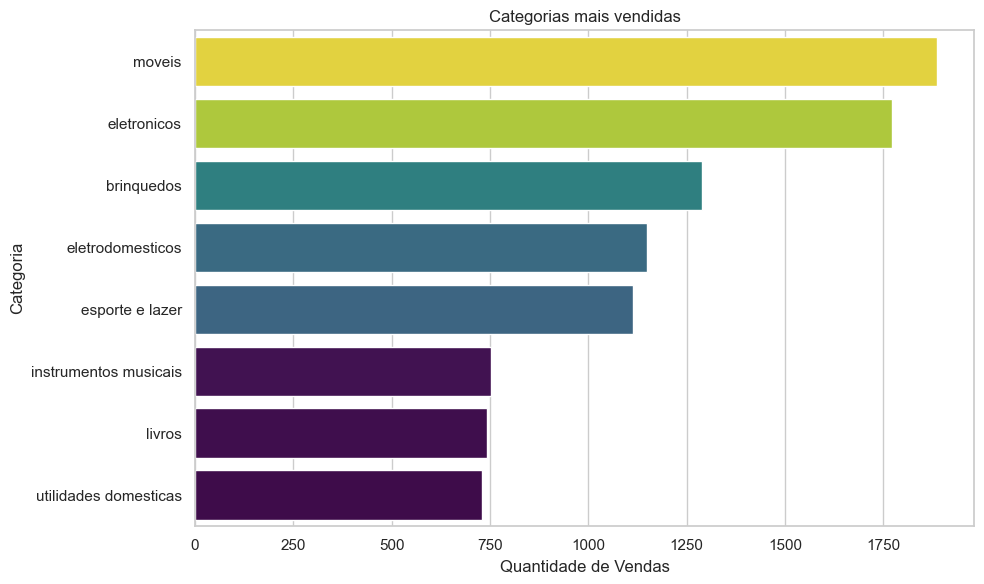

In [6]:
# 2. Gráfico Barras Categorias mais vendidas
plt.figure(figsize=(10, 6))
sns.barplot(x=categorias_vendidas.values, y=categorias_vendidas.index, palette="viridis",hue= categorias_vendidas.values, legend=False)
plt.title("Categorias mais vendidas")
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [7]:
# ------------------------------
# 3. Avaliações dos Clientes
# ------------------------------
avaliacoes = df["Avaliação da compra"].value_counts().sort_index()
media_avaliacao = df["Avaliação da compra"].mean()
print("\nAvaliações dos clientes:")
print(avaliacoes)
print(f"Média das avaliações: {media_avaliacao:.2f}")


Avaliações dos clientes:
Avaliação da compra
1    1199
2     343
3     830
4    1813
5    5250
Name: count, dtype: int64
Média das avaliações: 4.01


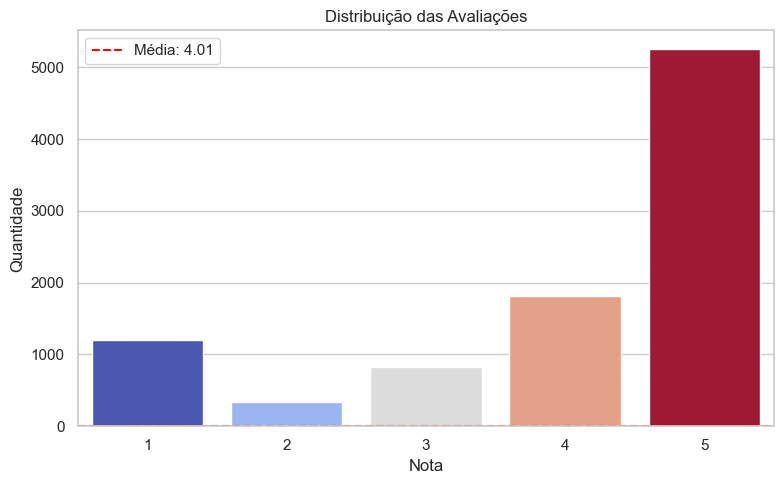

In [8]:
# 3.Avaliações dos clientes
plt.figure(figsize=(8, 5))
sns.barplot(x=avaliacoes.index, y=avaliacoes.values, palette="coolwarm",hue= avaliacoes.index, legend=False)
plt.axhline(y=media_avaliacao, color="red", linestyle="--", label=f"Média: {media_avaliacao:.2f}")
plt.legend()
plt.title("Distribuição das Avaliações")
plt.xlabel("Nota")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [9]:
# ------------------------------
# 4. Produtos Mais Vendidos
# ------------------------------
produtos_vendidos = df["Produto"].value_counts().head(10)
print("\n Top 10 produtos mais vendidos:")
print(produtos_vendidos)



 Top 10 produtos mais vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64


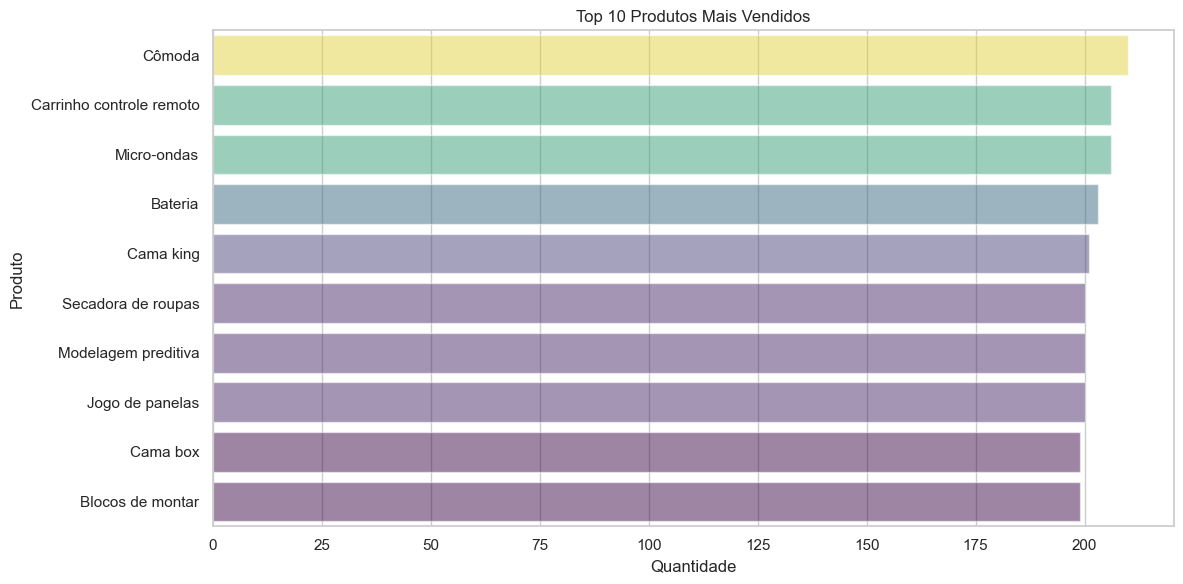

In [10]:
# 4. Produtos mais vendidos
plt.figure(figsize=(12, 6))
#sns.barplot(x=produtos_vendidos.values, y=produtos_vendidos.index, palette="magma",hue= produtos_vendidos.values, legend=False)
sns.barplot(x=produtos_vendidos.values, y=produtos_vendidos.index, palette=sns.color_palette("viridis", as_cmap=True), alpha=0.5,hue= produtos_vendidos.values, legend=False)
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [11]:
# ------------------------------
# 5. Frete Médio
# ------------------------------
frete_por_loja = df.groupby("Loja")["Frete"].mean().round(2)
print("\n Frete médio por loja:")
print(frete_por_loja)


 Frete médio por loja:
Loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


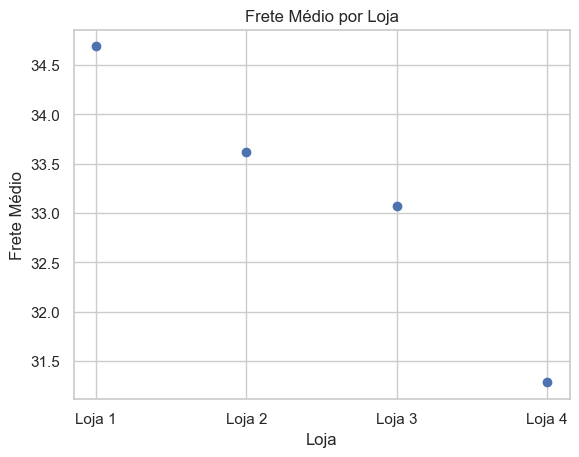

In [ ]:
# 5. Boxplot do Frete
#Gráfico de Dispersão
plt.scatter(frete_por_loja.index, frete_por_loja.values)
plt.title("Frete Médio por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio")
plt.grid(True)
plt.show()

# Análise e Recomendação: Venda de Unidade da Alura Store

Em apoio à decisão do Senhor João quanto à venda de uma unidade da rede Alura Store, foi realizada uma análise detalhada dos dados de faturamento, avaliações de clientes, frete médio e desempenho geral das lojas.

**Loja recomendada para venda: Loja 4**


# Justificativas:

**Menor faturamento total:** A Loja 4 apresenta o menor faturamento entre todas as unidades, sendo a que menos contribui para o caixa da rede.

**Avaliação apenas intermediária:** Sua nota média de avaliação é **3,99**, inferior às obtidas pelas Lojas 2 e 3, indicando percepção de qualidade moderada pelos clientes.

**Frete médio mais baixo:** Embora o frete reduzido seja positivo para o consumidor, pode indicar menor margem de lucro ou atuação em regiões de menor rentabilidade.

**Desempenho geral inferior:** A Loja 4 não lidera em nenhuma das principais métricas analisadas, reforçando seu desempenho abaixo do esperado.

# Conclusão:
Recomenda-se a venda da Loja 4, permitindo ao Senhor João manter as operações mais eficientes e rentáveis da rede, além de preservar as lojas com melhor percepção pelos clientes. Esta decisão maximiza o potencial de crescimento e lucratividade para o novo empreendimento.

